In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'ETT-small/ETTm1.csv', index_col=0)

In [4]:
etth1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


In [5]:
etth1.shape

(69680, 7)

<Axes: xlabel='date'>

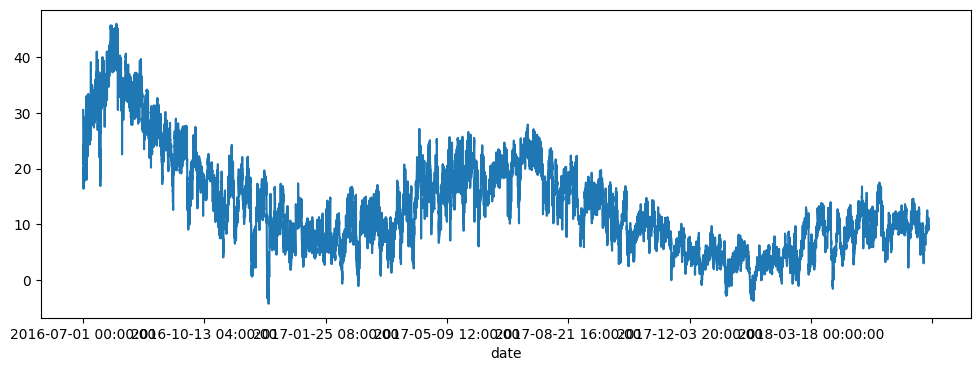

In [6]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [7]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

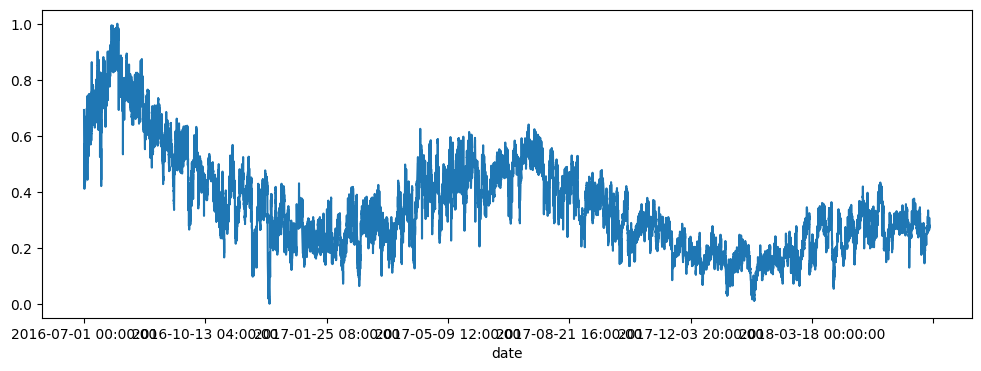

In [8]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [9]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1772996126
Epoch 2, Boundaries delta: 0.0700765069, Codewords delta: 0.0518916406
Epoch 3, Boundaries delta: 0.0476059011, Codewords delta: 0.0390047755
Epoch 4, Boundaries delta: 0.0354097702, Codewords delta: 0.0282398963
Epoch 5, Boundaries delta: 0.0253096542, Codewords delta: 0.0208777716
Epoch 6, Boundaries delta: 0.0185839355, Codewords delta: 0.0161609256
Epoch 7, Boundaries delta: 0.0144689684, Codewords delta: 0.0128770206
Epoch 8, Boundaries delta: 0.0115232495, Codewords delta: 0.0104004559
Epoch 9, Boundaries delta: 0.0095361950, Codewords delta: 0.0086802672
Epoch 10, Boundaries delta: 0.0081595709, Codewords delta: 0.0074905143
Epoch 11, Boundaries delta: 0.0072485093, Codewords delta: 0.0065907666
Epoch 12, Boundaries delta: 0.0064841519, Codewords delta: 0.0058399347
Epoch 13, Boundaries delta: 0.0058346363, Codewords delta: 0.0052769726
Epoch 14, Boundaries delta: 0.0052786552, Codewords delta: 0.0048379784
E

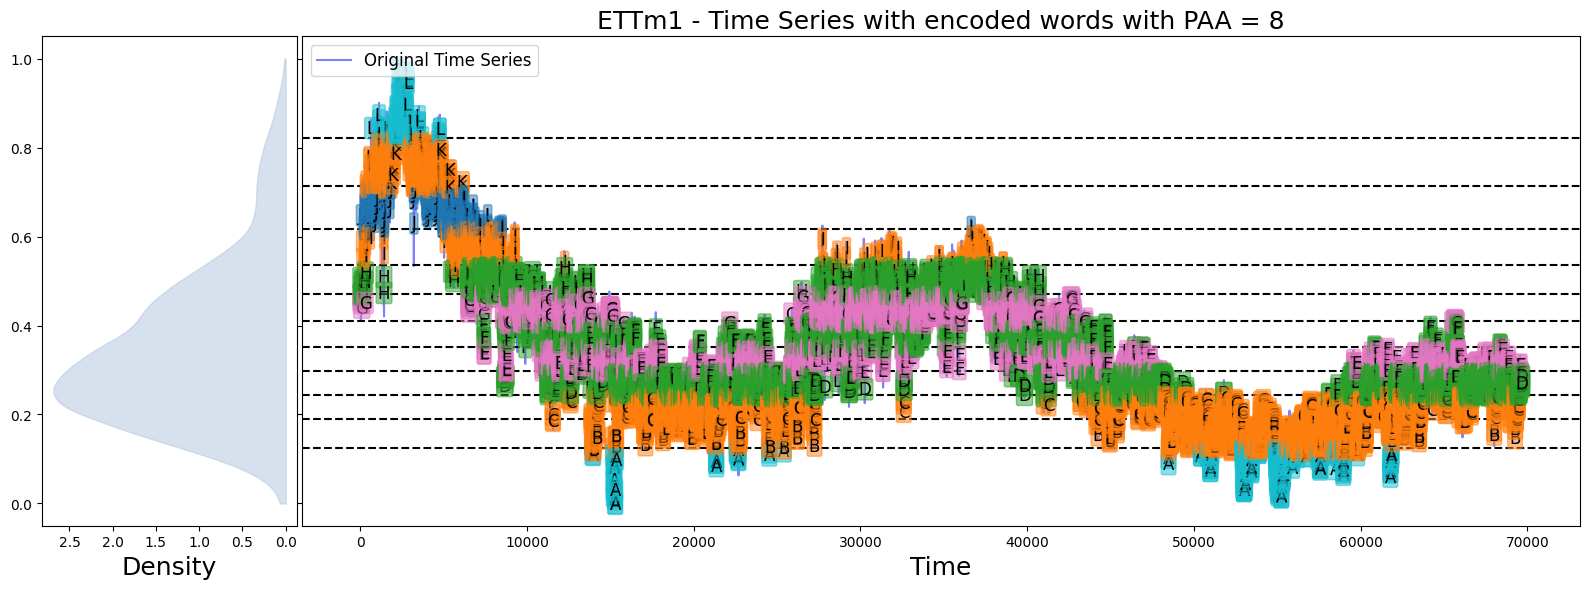

In [11]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=8)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTm1_ksax.png", data_name='ETTm1')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTm1_ksax.csv")

### Stationary

In [10]:
target = scaled_etth1
target = target.diff().dropna()

In [11]:
target.head()

date
2016-07-01 00:15:00   -0.001414
2016-07-01 00:30:00   -0.008402
2016-07-01 00:45:00   -0.060225
2016-07-01 01:00:00    0.015410
2016-07-01 01:15:00   -0.001394
dtype: float64

Epoch 1, Boundaries delta: 0.0606597738, Codewords delta: 0.0553400299
Epoch 2, Boundaries delta: 0.0220691420, Codewords delta: 0.0139172116
Epoch 3, Boundaries delta: 0.0129870967, Codewords delta: 0.0092326473
Epoch 4, Boundaries delta: 0.0087284863, Codewords delta: 0.0069931233
Epoch 5, Boundaries delta: 0.0062929208, Codewords delta: 0.0053862120
Epoch 6, Boundaries delta: 0.0047056180, Codewords delta: 0.0041959101
Epoch 7, Boundaries delta: 0.0037095106, Codewords delta: 0.0033127483
Epoch 8, Boundaries delta: 0.0030272694, Codewords delta: 0.0026902162
Epoch 9, Boundaries delta: 0.0025239062, Codewords delta: 0.0023572017
Epoch 10, Boundaries delta: 0.0022183134, Codewords delta: 0.0020929054
Epoch 11, Boundaries delta: 0.0019908384, Codewords delta: 0.0018744746
Epoch 12, Boundaries delta: 0.0018125990, Codewords delta: 0.0016916658
Epoch 13, Boundaries delta: 0.0016593959, Codewords delta: 0.0015369614
Epoch 14, Boundaries delta: 0.0015261430, Codewords delta: 0.0014045993
E

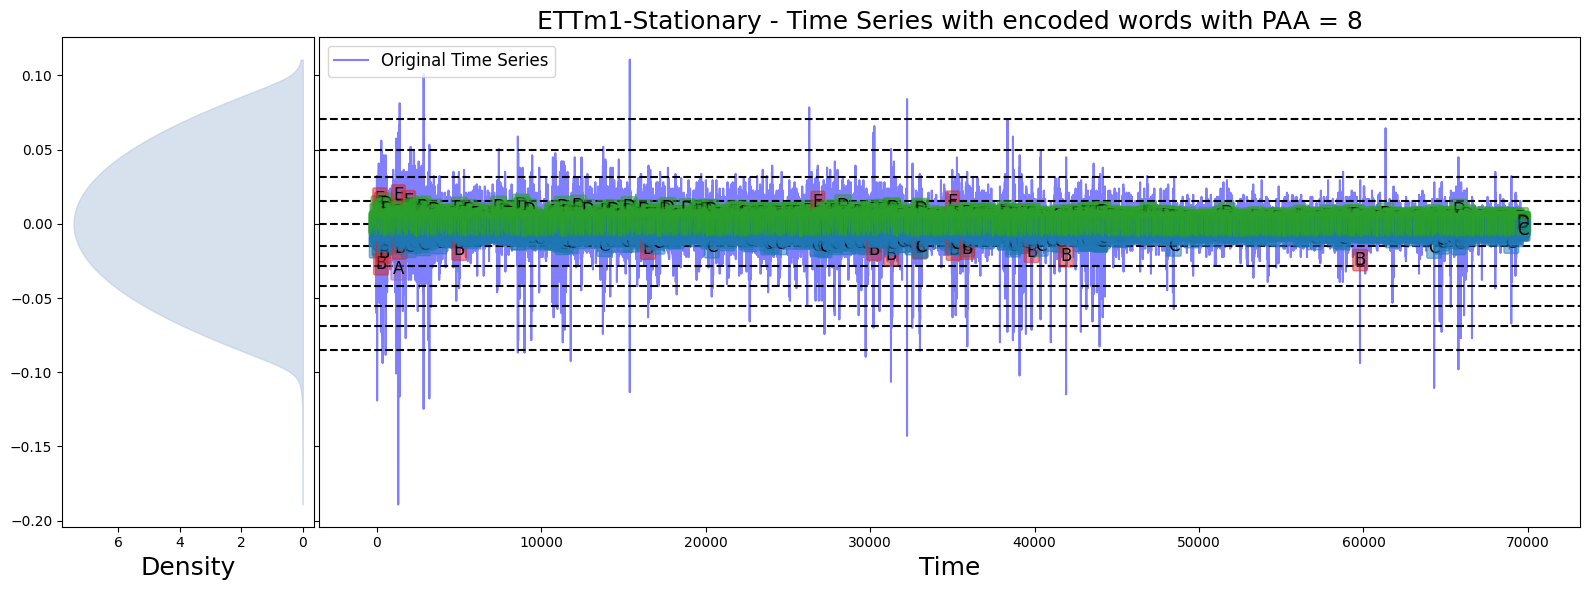

In [12]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=8)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTm1_stationary_ksax.png", data_name='ETTm1-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTm1_stationary_ksax.csv")